**k-Means**

1. Carregue a base `sample_stocks.csv`
2. Visualize suas informações
3. Plote a dispersão de `returns` vs. `dividendyield`
4. Normalize os dados
5. Plote novamente a dispersão
6. Crie e treine o KMeans com um valor de `k` que achar válido
7. Plote a dispersão juntamente com os `kmeans.cluster_centers_`
8. Analise o valor de `K` utilizando o método `Elbow` baseado na inércia (`kmeans.inertia_`)


# Atividade 06: k-Means

### 1. Carregamento da base de dados

In [4]:
import pandas as pd

df = pd.read_csv('../data/sample_stocks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   returns        648 non-null    int64  
 1   dividendyield  648 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


In [5]:
df.head()

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


In [6]:
df.describe()

,returns,dividendyield
count,648.000000,648.000000
mean,10.354938,2.434568
std,19.552899,1.645191
min,-20.000000,0.000000
25%,-10.000000,0.700000
50%,10.500000,2.500000
75%,31.000000,4.100000
max,40.000000,4.900000


### 2. Visualização dos dados

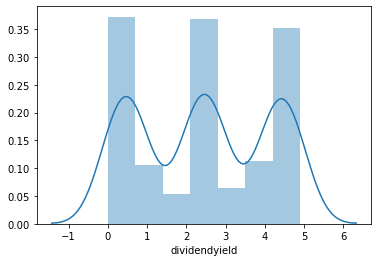

In [7]:
import seaborn as sns

# plot 'Price' distribution
sns.distplot(df['dividendyield'])

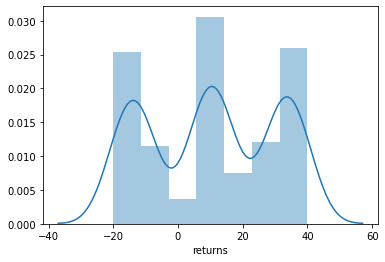

In [8]:
# plot 'Price' distribution
sns.distplot(df['returns'])

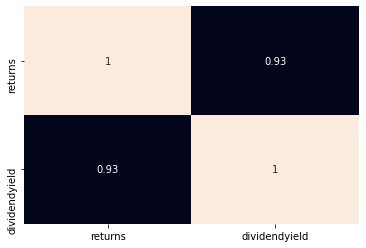

In [9]:
# plot correlations
sns.heatmap(df.corr(), 
            cbar=False, 
            annot=True)

### 3. Plote a dispersão de `returns` vs. `dividendyield`

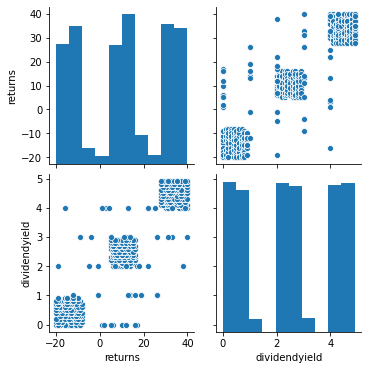

In [10]:
sns.pairplot(df)

### 4. Normalize os dados

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs    = pd.DataFrame(scaler.fit_transform(df),
                      columns=df.columns,
                      index=df.index)

dfs

,returns,dividendyield
0,-1.502468,-1.480951
1,-1.195372,-1.480951
2,-1.246554,-1.480951
3,-0.990640,-1.480951
4,-1.502468,-1.480951
...,...,...
643,-0.325264,0.952255
644,0.135382,0.952255
645,-0.478812,0.952255
646,0.596027,0.952255


### 5. Plote novamente a dispersão

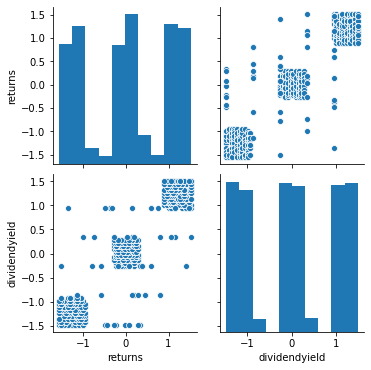

In [12]:
sns.pairplot(dfs)

### 6. Crie e treine o KMeans com um valor de `k` que achar válido

In [13]:
from sklearn.cluster import KMeans

# create k-mean object
model = KMeans(n_clusters=10, random_state=42)

# train model
km = model.fit(dfs)

### 7. Plote a dispersão com os`kmeans.cluster_centers_`

In [14]:
# view centers for each cluster
km.cluster_centers_

array([[-0.16407597, -0.10818733],
       [ 1.07685723,  1.37549557],
       [-1.34505718, -1.06833934],
       [ 0.00411284,  0.20941123],
       [ 0.17291578, -1.19707738],
       [ 1.11945672,  0.99605249],
       [ 0.20967936, -0.12012199],
       [-1.13258029, -1.33671498],
       [ 1.42694817,  1.26400932],
       [-0.7091348 ,  0.74948759]])

In [15]:
# view the predicted classes
km.labels_

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 2,
       7, 2, 7, 7, 7, 7, 7, 7, 2, 7, 7, 2, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 2, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 2, 2, 2, 2, 7, 7,
       2, 7, 7, 2, 2, 7, 2, 7, 7, 7, 7, 7, 2, 2, 2, 7, 2, 2, 7, 7, 7, 2,
       2, 2, 7, 7, 7, 2, 7, 2, 2, 2, 2, 2, 7, 2, 2, 7, 2, 2, 7, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 0, 0, 0, 6, 6, 6, 0, 6, 0, 0, 6, 0, 0, 0, 6, 0, 0, 6, 0, 0,
       6, 0, 0, 6, 6, 0, 6, 6, 0, 6, 0, 6, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 6, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6, 6, 0, 0, 6, 0, 0,
       6, 0, 6, 0, 6, 0, 0, 6, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0,
       6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 6, 3, 6, 3, 0,

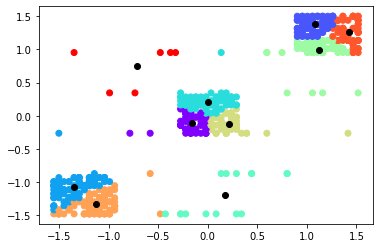

In [16]:
from matplotlib import pyplot as plt

# plot clusters
plt.scatter(dfs['returns'].values,
            dfs['dividendyield'].values,
            c=km.labels_, 
            cmap='rainbow')

# plot centroids
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            color='black') 

plt.show()

### 8. Analise o valor de `K`

In [17]:
import json

def get_inertia_by_k(max_k=10):
    results = {}
    for k in range(1,max_k):
        model = KMeans(n_clusters=k)
        model.fit(dfs) 
        results[k] = model.inertia_ 
    return results


results = get_inertia_by_k()
print(json.dumps(results, indent=2))

{
  "1": 1296.0,
  "2": 386.98068568789614,
  "3": 77.62109287678899,
  "4": 61.645431515125466,
  "5": 57.64918259753631,
  "6": 47.600387127812695,
  "7": 42.53201784008928,
  "8": 37.2936764860545,
  "9": 33.30618587861829
}


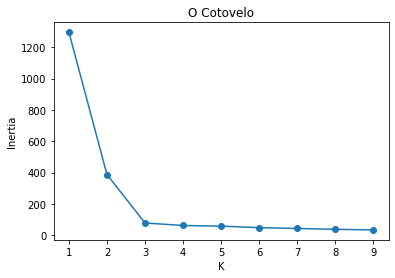

In [18]:
k        = list(results.keys())
inertias = list(results.values())

# 'o' for dots and '-' for lines
plt.plot(k, inertias, 'o-') 
plt.xlabel('K') 
plt.ylabel('Inertia') 
plt.title('O Cotovelo') 
plt.show() 

In [19]:
from sklearn.cluster import KMeans

# create k-mean object
model = KMeans(n_clusters=3, random_state=42)

# train model
best_km = model.fit(dfs)

### 9. Plotar dispersão com melhor valor para `K`

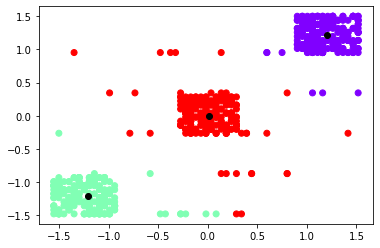

In [20]:
# plot clusters
plt.scatter(dfs['returns'].values,
            dfs['dividendyield'].values,
            c=best_km.labels_, 
            cmap='rainbow')

# plot centroids
plt.scatter(best_km.cluster_centers_[:, 0],
            best_km.cluster_centers_[:, 1],
            color='black') 

plt.show()